In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/M E L S A/Desktop/M E L S A/data_science/datasciencetemp/week-6/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


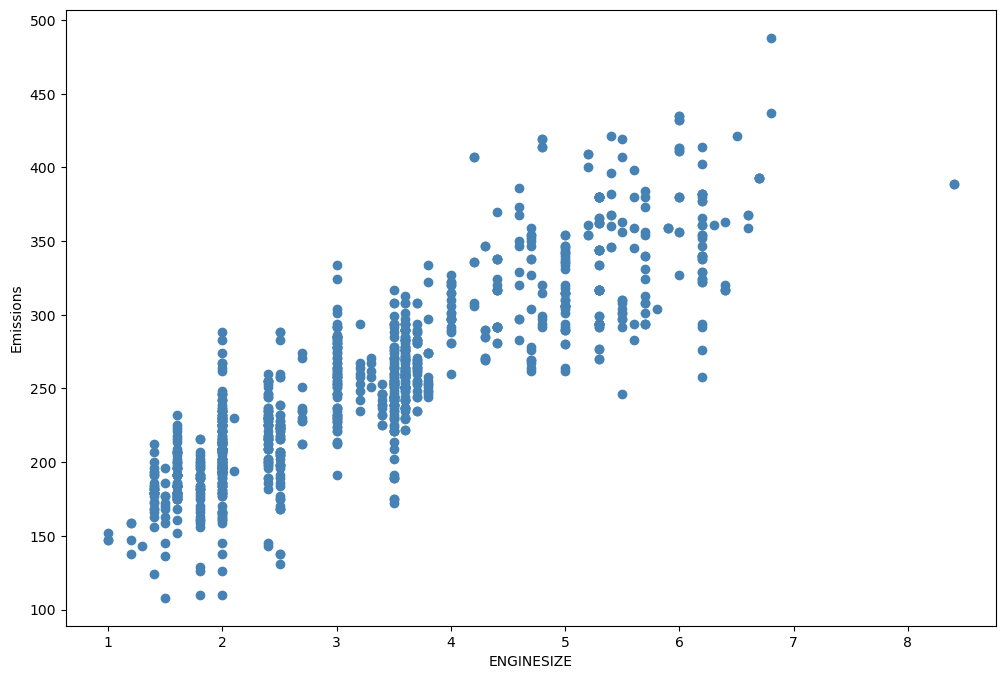

In [5]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [7]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [8]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    1.8   3.24]
 [ 1.    3.4  11.56]
 [ 1.    3.7  13.69]
 ...
 [ 1.    5.7  32.49]
 [ 1.    6.2  38.44]
 [ 1.    2.    4.  ]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [9]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [10]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         49.9340287  -1.42457634]]
Intercept: [108.38406473]


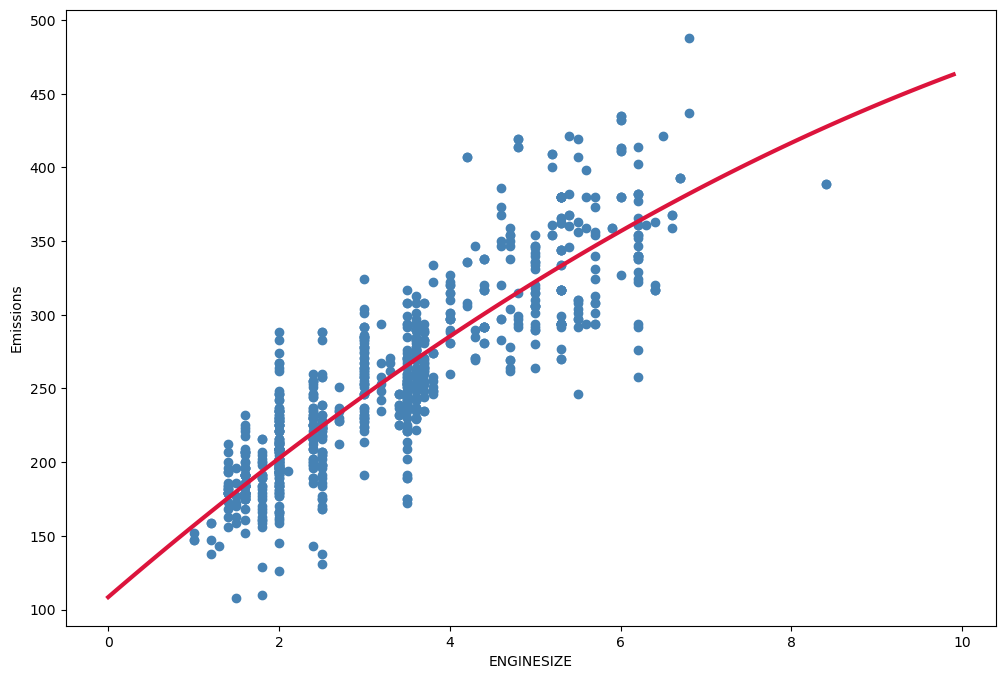

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [12]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[108.38406473 113.36322184 118.31388742 123.23606147 128.129744
 132.994935   137.83163447 142.63984242 147.41955884 152.17078373
 156.8935171  161.58775894 166.25350925 170.89076804 175.49953529
 180.07981103 184.63159523 189.15488791 193.64968907 198.11599869
 202.55381679 206.96314336 211.34397841 215.69632193 220.02017392
 224.31553439 228.58240332 232.82078074 237.03066662 241.21206098
 245.36496381 249.48937512 253.5852949  257.65272315 261.69165987
 265.70210507 269.68405874 273.63752089 277.56249151 281.4589706
 285.32695816 289.1664542  292.97745871 296.7599717  300.51399316
 3

# Evaluation
- Mean Absolute Error (MAE)
- Mean Squared Error (SME)
- R2 Score

In [16]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 22.35
Mean Squared Error (MSE): 825.80
R2-Score: 0.77


### Practice
#### Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

IndexError: index 3 is out of bounds for axis 0 with size 3

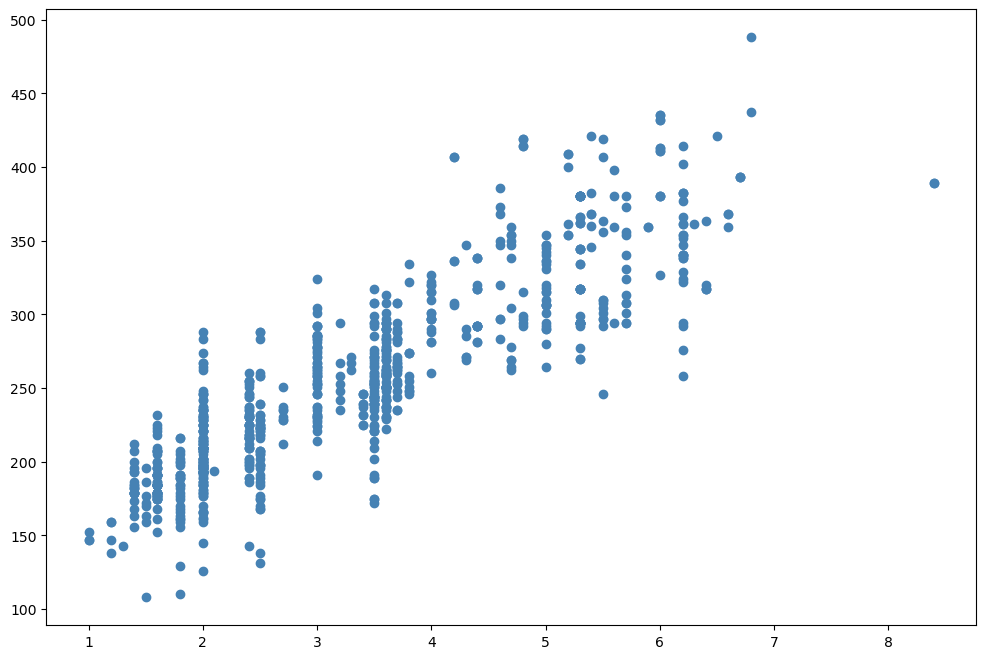

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) + clf.coef_[0][3] * np.power(XX,3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [31]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[108.38406473 113.36322184 118.31388742 123.23606147 128.129744
 132.994935   137.83163447 142.63984242 147.41955884 152.17078373
 156.8935171  161.58775894 166.25350925 170.89076804 175.49953529
 180.07981103 184.63159523 189.15488791 193.64968907 198.11599869
 202.55381679 206.96314336 211.34397841 215.69632193 220.02017392
 224.31553439 228.58240332 232.82078074 237.03066662 241.21206098
 245.36496381 249.48937512 253.5852949  257.65272315 261.69165987
 265.70210507 269.68405874 273.63752089 277.56249151 281.4589706
 285.32695816 289.1664542  292.97745871 296.7599717  300.51399316
 3

In [32]:
from sklearn.metrics import r2_score

# Test verileri polinomla dönüştürülür
test_x_poly = poly.transform(test_x)

# Tahminler yapılır
test_y_ = clf.predict(test_x_poly)

# Hata ve R2 skorları hesaplanır
print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 22.35
Mean Squared Error (MSE): 825.80
R2-Score: 0.77
